# Assignment 4:
    test if the distribution of 
    
    1) trip duration of bikers that ride during the day vs night
    
    2) age of bikers for trips originating in Manhattan and in Brooklyn (extra credit)
    
    are different. Use 3 tests: KS, Pearson's, Spearman's. 
    
    Use the scipy.stats functions scipy.stats.ks_2samp, scipy.stats.pearsonr, scipy.stats.spearmanr. 
    
    For the KS do the test with the entire dataset and with a subset 200 times smaller
    
    Choose a single significant threshold for the whole exercise. 
    
    For each test phrase the Null Hypothesis in words.
    
    Describe the return of the scipy function you use in each case.
    
    State the result in terms of rejection of the Null.

In [51]:
# my usual imports and setups
import pylab as pl
import pandas as pd
import numpy as np
from numpy import random
#imports downloader
#from getCitiBikeCSV import getCitiBikeCSV

%pylab inline

import os
#this makes my plots pretty! but it is totally not mandatory to do it
import json
#s = json.load( open(os.getenv ('PUI2016')+"/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)


Populating the interactive namespace from numpy and matplotlib


# Read in data
I am reading in data from January 2015 with the function that I created getCitiBikeCSV. You are requested to use 2 months at least. It would be a good idea to use data from a colder and a warmer months, since there are more riders in the warm weather and ridership patterns may change with weather, temperature, etc. You should use data from multiple months, joining multiple datasets (thus addressing some systematic errors as well)

In [2]:
#datestring = '201501'
#getCitiBikeCSV(datestring)

In [3]:
#df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df1 = pd.read_csv(os.getenv("PUIDATA") + '/201608-citibike-tripdata.csv')
df2 = pd.read_csv(os.getenv("PUIDATA") + '/201511-citibike-tripdata.csv') 
frames = [df1,df2]
df = pd.concat(frames, ignore_index=True)

In [4]:
df.drop([u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'], axis = 1, inplace = True)

In [5]:
df.head()

,tripduration,starttime
0,288,8/1/2016 00:01:22
1,457,8/1/2016 00:01:43
2,278,8/1/2016 00:02:10
3,862,8/1/2016 00:02:13
4,407,8/1/2016 00:02:21


**H0: there is no statistical difference in the trip duation between day time and night time**
$$ \alpha = 0.05 $$


In [6]:
df['hour'] = pd.to_datetime(df['starttime'],format="%m/%d/%Y %H:%M:%S").dt.hour

In [7]:
df['Day'] = df['tripduration'][(df['hour'] >= 6) & (df['hour'] < 18)]
df['Night'] = df['tripduration'][((df['hour'] >= 18) & (df['hour'] <= 23)) |((df['hour'] >= 0) & (df['hour'] < 6))]

In [9]:
df.head()

,tripduration,starttime,hour,Day,Night
0,288,8/1/2016 00:01:22,0,NaN,288.0
1,457,8/1/2016 00:01:43,0,NaN,457.0
2,278,8/1/2016 00:02:10,0,NaN,278.0
3,862,8/1/2016 00:02:13,0,NaN,862.0
4,407,8/1/2016 00:02:21,0,NaN,407.0


In [11]:
df.drop(['tripduration', 'starttime', 'hour'], axis = 1, inplace = True)

In [12]:
df.head()

,Day,Night
0,NaN,288.0
1,NaN,457.0
2,NaN,278.0
3,NaN,862.0
4,NaN,407.0


In [13]:
df.describe()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Day,Night
count,1.783479e+06,7.614290e+05
mean,9.788583e+02,9.729104e+02
std,8.329265e+03,1.044102e+04
min,6.100000e+01,6.100000e+01
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,3.565469e+06,3.966943e+06


In [14]:
df['Day'].dropna(inplace= True)
df['Night'].dropna(inplace= True)

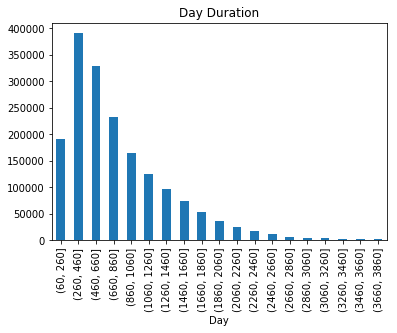

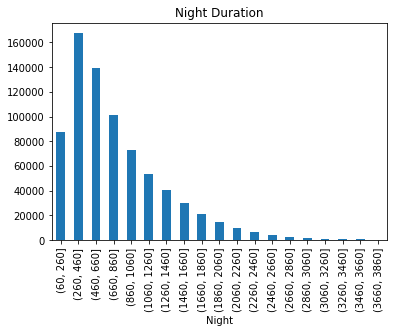

In [21]:
# plotting histogramswith pandas is a bitdifferent than with pylab
# this is a VERY USEFUL syntaxfor you to knonw!
bins = np.arange(60, 4000, 200)
axD = df.Day.groupby(pd.cut(df.Day, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axD.set_title("Day Duration")
axN = df.Night.groupby(pd.cut(df.Night, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axN.set_title("Night Duration");

              count_nonzero
Day                        
(60, 260]          0.006559
(260, 460]         0.006296
(460, 660]         0.004622
(660, 860]         0.006992
(860, 1060]        0.009637
(1060, 1260]       0.010463
(1260, 1460]       0.009419
(1460, 1660]       0.006984
(1660, 1860]       0.005135
(1860, 2060]       0.004178
(2060, 2260]       0.003826
(2260, 2460]       0.003383
(2460, 2660]       0.002871
(2660, 2860]       0.002392
(2860, 3060]       0.001920
(3060, 3260]       0.001368
(3260, 3460]       0.000885
(3460, 3660]       0.000490
(3660, 3860]       0.000000


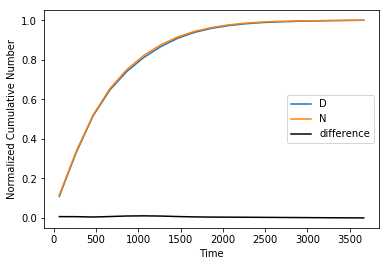

In [20]:
#print df.ageS, df.ageS.cumsum()

csD=df.Day.groupby(pd.cut(df.Day, bins)).agg([count_nonzero]).cumsum()

csN=df.Night.groupby(pd.cut(df.Night, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csD / csD.max()-csN / csN.max()))

pl.plot(bins[:-1] + 5, csD / csD.max(), label = "D")
pl.plot(bins[:-1] + 5, csN / csN.max(), label = "N")
pl.plot(bins[:-1] + 5, np.sqrt(csN / csN.max() - csD / csD.max())**2, 'k-',
        label = "difference")
pl.xlabel("Time")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

** Figure 2: the cumulative distribution of CitiBike riders' trip duration in day time and night time**

They look similar! But the difference gets to 10%. If I wanted to code the KS test by hand I woud have everything I need: the normalized cumulative distributions can be subtracted from each other and the max distance can calculated. 

Notice that there may be NaN values you are gonna have to deal with! 
You can do that for example with a Boolean statementsuch as  df.ageF[~np.isnan(df.ageF)] or you can use numpy functions that deal with Nan values: nansum, nanmean, nanstd...

lets run the scipy KS test

In [64]:
import scipy.stats
#remember that your imports should all be at the top. I leave it here to hightlight that this package is needed at this point of the workflow

# KS tests to compare 2 samples

http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html

the KS test in scipy returns the p-value BUT make sure you understand what the NULL is! read the documentation carefully! what is the null hypothesis that you can/cannot reject?

Null Hypothesis: The sample of trip duration during day time and the sample of trip duration during night time were drawn from the same distribution

Alternative Hypothesis: The sample of trip duration during day time and the sample of trip duration during night time were not drawn from the same distribution

Significant Level: $\alpha$ = 0.05

In [68]:
ks = scipy.stats.ks_2samp(df.Day, df.Night)
print (ks)

Ks_2sampResult(statistic=0.014691015368948002, pvalue=1.718415722740198e-100)


**  FILL IN THE CELL BELOW!**

In [75]:
score = ((len(df.Day) + len(df.Night)) / (len(df.Day) * len(df.Night)))**0.5 * 1.36
         
print(score)

0.0


**Conclusion:** because the statistic has small value, the difference between two samples is small. However, we have a very high p-value, meaning the null hypothesis is rejected.

The scipy.stats KS test already tells me the significance and the p-value. 

The next few cells are here just to show you how you would obtain the same result by hand, but they are **not required**. 

Remember: the Null hypothesis is rejected if 

$D_KS(n1,n2) > c(\alpha) \sqrt{\frac{(n1 + n2)}{n1n2}}$

(see class notes) where $c(\alpha$) is the inverse of the KS distribution, and you do not have to know how to get that cause there are tables that list critical values!! 

http://www.real-statistics.com/tests-normality-and-symmetry/statistical-tests-normality-symmetry/kolmogorov-smirnov-test/kolmogorov-distribution/

But also this result depends in your choice of binning through, and thustheresultyou get by hand may not be exactly the same as the one the KS returns. Either way: this is how you would calculate the KS statistics by hand.

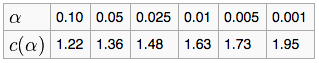

In [16]:
#here is the critical values tablel. Have you chosen your significance level yet?? you should do it first thing!
from IPython.display import Image
Image(filename="../plotsforclasses/ks2sample_table.png")

In [53]:
#ks = scipy.stats.ks_2samp(df.durD[0:200], df.durN[0:200])
random.seed(100)
k1 = np.random.choice(df.Day, 200,replace=False)
k2 = np.random.choice(df.Night, 200,replace=False)
ks = scipy.stats.ks_2samp(k1, k2)

print (ks)

Ks_2sampResult(statistic=0.09000000000000001, pvalue=0.37665913494839609)


In [63]:
score = (((200 + 200)/(200*200)))**0.5 * 1.36

print (score)

0.0


**Conclusion:** because the statistic has small value, the difference between two samples is small. However, we have a high p-value, meaning the null hypothesis is rejected.

# Now retest using a test for correlation. 

That will answer a slightly different question though - formulate the NULL appropriately. The tests for correlations (generally) requires the variable to be paired, so that I can tell if x changes does y change similarly. But the datasets are of different size! You will need to reduce them to the same size. You can do that by subsampling of the data: take only 1 ride every of 200, which you can achieve "slicing and broadcasting" the array or using one of the python function (built in python numpy.random.choice() functions for example: Docstring:
choice(a, size=None, replace=True, p=None)

Generates a random sample from a given 1-D array

        .. versionadded:: 1.7.0

Parameters
...

But make sure you understand how to use it! there is an option "replace" which you should think about.

# Pearson's  test for correlation

** notice that the Pearson's is a pairwise test: the samples need to be **
 a. the same size
 b. sorted! (how??)
    
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr

Null Hypothesis: There is no statistically significant relationship between trip duration during day time and trip duration during night time.

Alternative Hypothesis: There is statistically significant relationship between trip duration during day time and trip duration during night time.

Significant Level: $\alpha$ = 0.05

In [78]:
# your code here!
# wrangle the data as needed
# please perform the Pearson's test 
# and tell me what you find in terms of NULL hypothesis
random.seed(222)
p1 = np.random.choice(df.Day, 5000,replace=False)
p2 = np.random.choice(df.Night, 5000,replace=False)
p1 = np.sort(p1)
p2 = np.sort(p2)


scipy.stats.pearsonr(p1, p2)

(0.91699727140656062, 0.0)

**Conclusion:** the correlation of 0.927 indicates a strong positive correlation between two variables.
Since p <0.05, the null hypothesis is rejected, meaning that there is statistically significant relationship between trip duration during day time and trip duration during night time.

# Spearman's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

Null Hypothesis: There is no monotonic correlation between trip duration during day time and trip duration during night time.

Alternative Hypothesis: There is monotonic correlation between trip duration during day time and trip duration during night time.

Significant Level: $\alpha$ = 0.05

In [76]:
# your code here!
# wrangle the data as needed
# please perform the Spearman's test and tell me what you find in terms of NULL hypothesis
random.seed(222)
s1 = np.random.choice(df.Day, 8000,replace=False)
s2 = np.random.choice(df.Night, 8000,replace=False)
scipy.stats.spearmanr(s1,s2)

SpearmanrResult(correlation=-0.016826896759263792, pvalue=0.13234599376646555)

**Conclusion:** the correlation of -0.01682 indicates no apparent correlation between two variables.
Since p > 0.05, the null hypothesis fails to be rejected, meaning that there is no monotonic correlation between trip duration during day time and trip duration during night time.